## Лабораторная работа №3
ФИО: Брызгалова Юлия Александровна  
Группа: БИВТ-21-4

Исходные данные:
Название датасета: Medical Cost Personal Datasets  
Ссылка на датасет: https://www.kaggle.com/datasets/mirichoi0218/insurance

Ход работы:
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (если у вас многоклассовая классификация, прочтите P.S.S. внизу).
3. Сделать предобработку данных:  
&nbsp; A. Разделить выборку на тренировочную (train) и тестовую (test). Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test.  
&nbsp; B. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.  
&nbsp; C. Отнормировать численные переменные (StandardScaler, MinMaxScaler).  
&nbsp; D. Закодировать категориальные признаки по одной из стратегий.  
4. Обучить на тренировочном множестве:  
&nbsp; A. Линейную модель (LogisticRegression, LinearRegression)  
&nbsp; B. Деревянную модель (DecisionTreeClassifier, DecisionTreeRegressor) (тут советую попробовать разные глубины деревьев)  
&nbsp; C. K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor) (тут тоже есть смысл попробовать разные k)  
&nbsp; D. Случайный лес (RandomForestClassifier, RandomForestRegressor)
5. Посчитайте метрики на train и test множествах:  
&nbsp; A. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score  
&nbsp; B. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:  
&nbsp; A. Какая модель справилась лучше с поставленной задачей?  
&nbsp; B. Имеет ли место переобучение?  
&nbsp; C. Имеет ли место недообучение?  
&nbsp; D. Как можно улучшить метрики моделей?

1. Импорт данных

In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv', sep = ',')  # если нужно, можно поменять разделитель

2. Данная задача ялвяется задачей регресии, относительно целевой переменной 'charges', характеризующей медицинские расходы, оплачиваемые страховой.  
Целевое событие является непрерывным, принадлежит диапазону значений от 1121.8739 до 63770.42801.

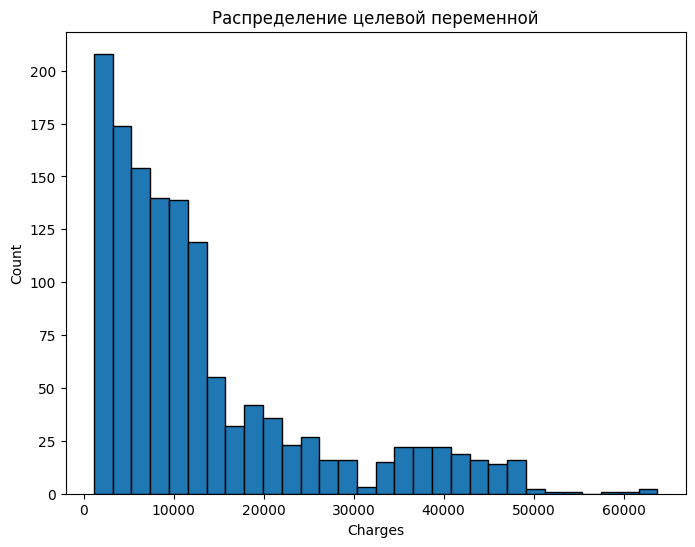

Количество уникальных значений целевой переменной: 1337


charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [2]:
# Построение распределения charges - целевой переменной в виде гистограммы
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
plt.hist(data['charges'], edgecolor = 'black', bins = 30) 
plt.title('Распределение целевой переменной')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

# Количество уникальных значений целевой переменной
# nunique() - функция, вычисляющая кол-во уникальных записей
unique_charges = data['charges'].nunique()
print(f'Количество уникальных значений целевой переменной: {unique_charges}')
data['charges'].unique()
# value_counts() - функция, возвращающая частоту встречающихся значений
data['charges'].value_counts()

3. Предобработка данных

* A. Деление выборки на тренировочную(train) и тестовую(test)

In [4]:
# Деление данных на train и test
from sklearn.model_selection import train_test_split

y = data['charges'].values
X = data.drop('charges', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


* B. Проверка пропусков данных  
_Если есть пропуски, то заполнить одной из стратегий:  
а) удалить наблюдения с пропущенными значениями;  
б) заменить пропущенные значения на моду, среднее, максимум, минимум, "Unknown" (для категориальных)_  

В данном наборе данных пропущенных значений нет.

In [5]:
# Проверка пропусков значений

# Кол-во отсутствующих данных по каждому признаку
# isnull() - метод, выдающий массив: пропуск(NaN) = True
# sum() - метод, суммирующий True
data.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* C. Отнормировать численные переменные (StandardScaler, MinMaxScaler)  

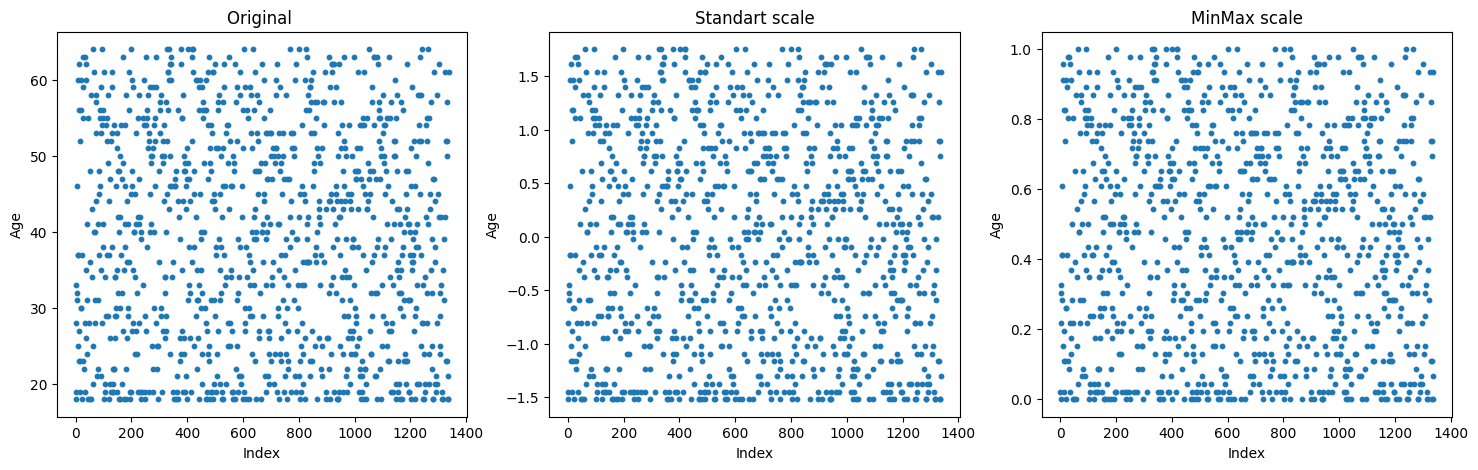

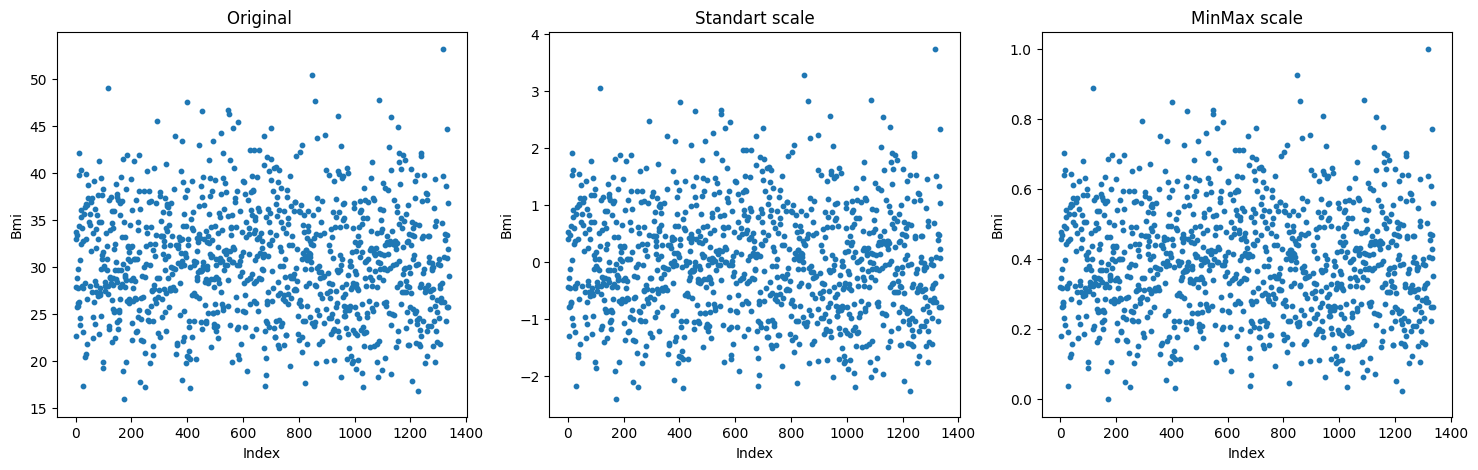

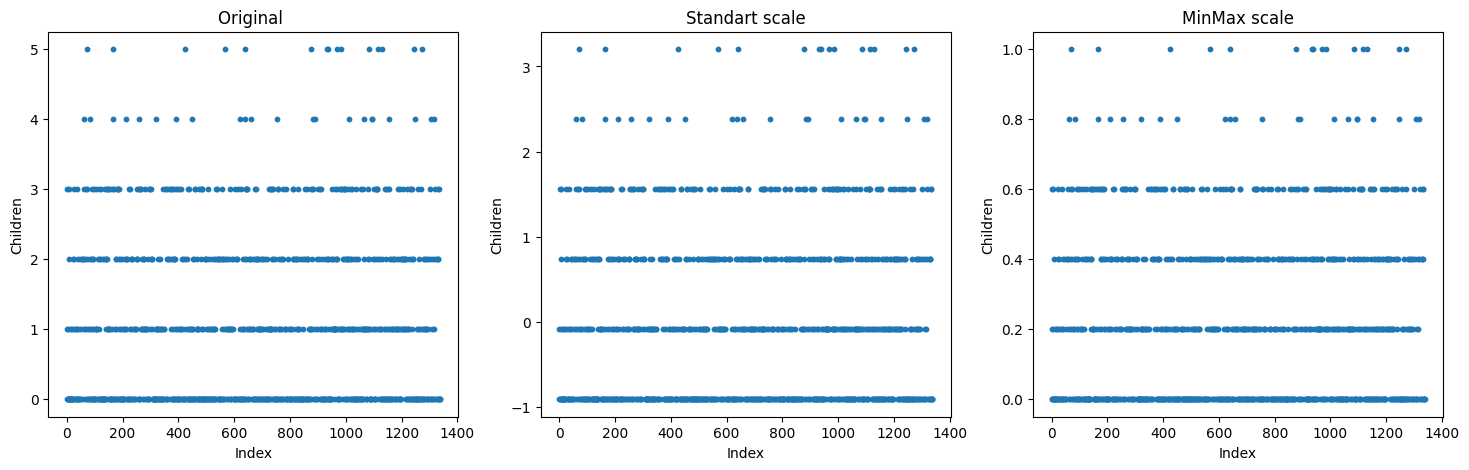

In [6]:
# Нормирование численных переменных - 'age', (StandardScaler, MinMaxScaler)
#                                     'bmi', (StandardScaler, MinMaxScaler)
#                                     'children' (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

feature = ['age', 'bmi', 'children']
for i in feature:
    X_train_std[i] = StandardScaler().fit_transform(X_train[i].values.reshape(-1, 1))
    X_test_std[i] = StandardScaler().fit_transform(X_test[i].values.reshape(-1, 1))
    X_train_minmax[i] = MinMaxScaler().fit_transform(X_train[i].values.reshape(-1, 1))
    X_test_minmax[i] = MinMaxScaler().fit_transform(X_test[i].values.reshape(-1, 1))

#age
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
axes[0].scatter(X_train.index, X_train['age'], s = 10)
axes[0].set_title('Original ')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Age')
axes[1].scatter(X_train_std.index, X_train_std['age'], s = 10)
axes[1].set_title('Standart scale')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Age')
axes[2].scatter(X_train_minmax.index, X_train_minmax['age'], s = 10)
axes[2].set_title('MinMax scale')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Age')

#bmi
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
axes[0].scatter(X_train.index, X_train['bmi'], s = 10)
axes[0].set_title('Original ')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Bmi')
axes[1].scatter(X_train_std.index, X_train_std['bmi'], s = 10)
axes[1].set_title('Standart scale')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Bmi')
axes[2].scatter(X_train_minmax.index, X_train_minmax['bmi'], s = 10)
axes[2].set_title('MinMax scale')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Bmi')

#children
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
axes[0].scatter(X_train.index, X_train['children'], s = 10)
axes[0].set_title('Original ')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Children')
axes[1].scatter(X_train_std.index, X_train_std['children'], s = 10)
axes[1].set_title('Standart scale')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Children')
axes[2].scatter(X_train_minmax.index, X_train_minmax['children'], s = 10)
axes[2].set_title('MinMax scale')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Children');

* D. Кодирование категориальных признаков (LabelEncoder, One Hot Encoding)  
_Используется LabelEncoder_

In [7]:
# Кодирование категориальных признаков по стратегии Label Encoder
# Категориальный признак - sex (female = 0), 
#                          smoker (yes = 1), 
#                          region (southwest = 3, southeast = 2, northwest = 1, northeast = 0)

from sklearn.preprocessing import LabelEncoder

X_train_minmax['sex'] = LabelEncoder().fit_transform(X_train_minmax['sex'])
X_train_minmax['smoker'] = LabelEncoder().fit_transform(X_train_minmax['smoker'])
X_train_minmax['region'] = LabelEncoder().fit_transform(X_train_minmax['region'])

X_test_minmax['sex'] = LabelEncoder().fit_transform(X_test_minmax['sex'])
X_test_minmax['smoker'] = LabelEncoder().fit_transform(X_test_minmax['smoker'])
X_test_minmax['region'] = LabelEncoder().fit_transform(X_test_minmax['region'])

print(X_train_minmax)

           age  sex       bmi  children  smoker  region
560   0.608696    0  0.107345       0.4       0       1
1285  0.630435    0  0.224913       0.0       0       0
1142  0.739130    0  0.239440       0.0       0       2
969   0.456522    0  0.493947       1.0       0       2
486   0.782609    0  0.148238       0.6       0       1
...        ...  ...       ...       ...     ...     ...
1095  0.000000    0  0.414044       0.8       0       0
1130  0.456522    0  0.212806       1.0       0       2
1294  0.869565    1  0.247915       0.0       0       0
860   0.413043    0  0.851224       0.4       1       3
1126  0.804348    1  0.375034       0.0       0       3

[1070 rows x 6 columns]


4. Обучение на тренировочном множестве

* A. Линейная модель (LogisticRegression, LinearRegression)  
_Используется LinearRegression_

Text(0.5, 1.0, 'Линейная модель')

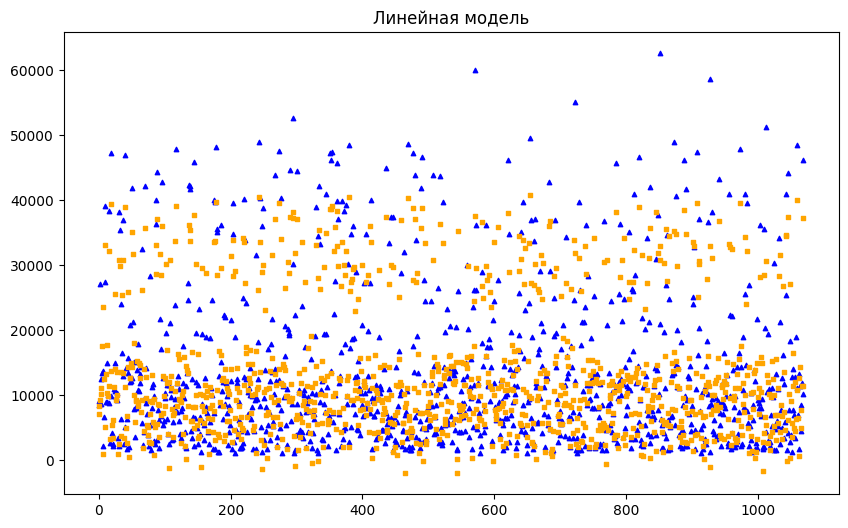

In [33]:
# Линейная модель - LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Обучение модели на X_train_minmax, y_train
lr.fit(X_train_minmax, y_train)
# Получение y_pred
lr_pred = lr.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(lr_pred)), lr_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'Линейная модель')


* B. Деревянная модель (DecisionTreeClassifier, DecisionTreeRegressor)  
_Используется DecisionTreeRegressor c глубиной деревьев равной 3, 9, 12_

In [9]:
#print(len(X_train_minmax) == len(y_train))

True


Text(0.5, 1.0, 'Деревянная модель, max_depth = 3')

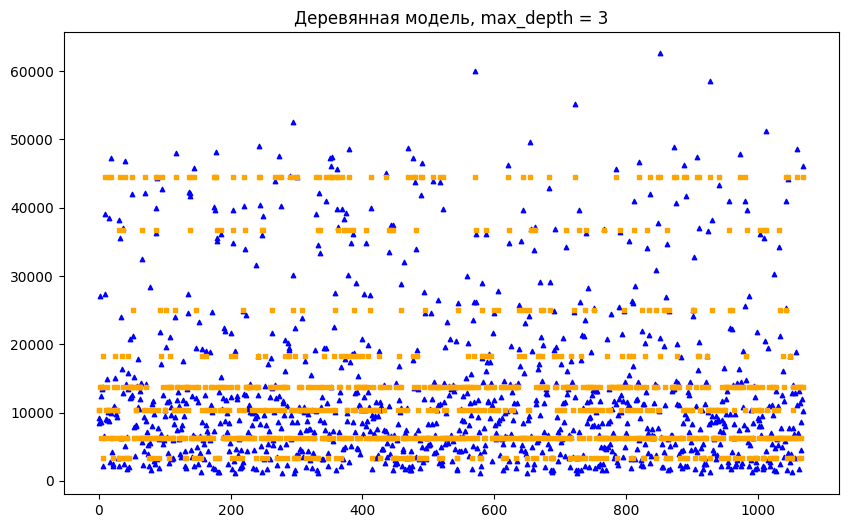

In [34]:
# Деревянная модель - DecisionTreeRegressor (max_depth = 3, random_state = 42)
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 3, random_state = 42)
tree.fit(X_train_minmax, y_train)
tree_pred = tree.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(tree_pred)), tree_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'Деревянная модель, max_depth = 3')

Text(0.5, 1.0, 'Деревянная модель, max_depth = 9')

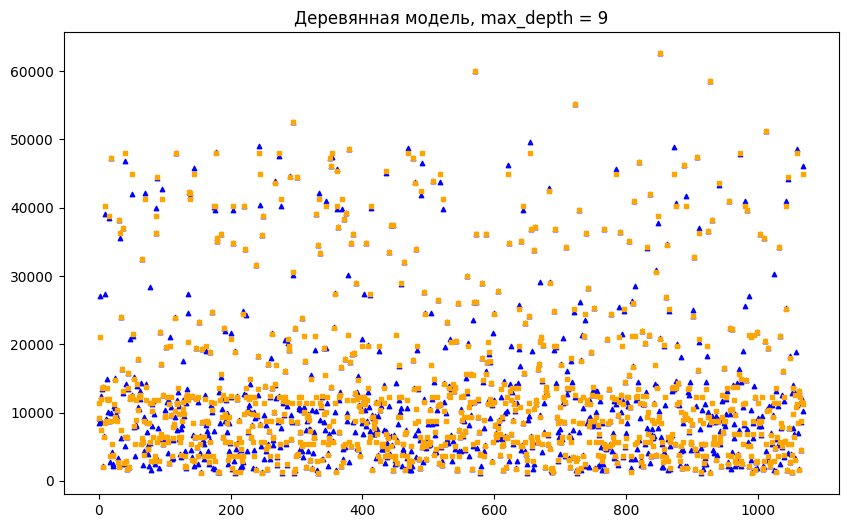

In [35]:
# Деревянная модель - DecisionTreeRegressor (max_depth = 9, random_state = 42)
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 9, random_state = 42)
tree.fit(X_train_minmax, y_train)
tree_pred = tree.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(tree_pred)), tree_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'Деревянная модель, max_depth = 9')

Text(0.5, 1.0, 'Деревянная модель, max_depth = 12')

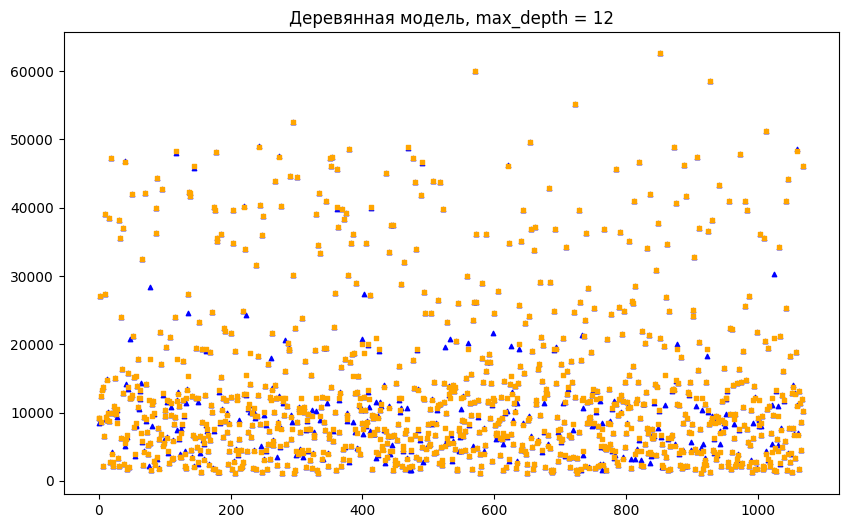

In [36]:
# Деревянная модель - DecisionTreeRegressor (max_depth = 12, random_state = 42)
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 12, random_state = 42)
tree.fit(X_train_minmax, y_train)
tree_pred = tree.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(tree_pred)), tree_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'Деревянная модель, max_depth = 12')

* C. K-ближайших соседей (KNeighborsClassifier, KNeighborsRegressor)  
_Используется KNeighborsRegressor с k равным 3, 5, 9_

Text(0.5, 1.0, 'K-ближайших соседей, k = 3')

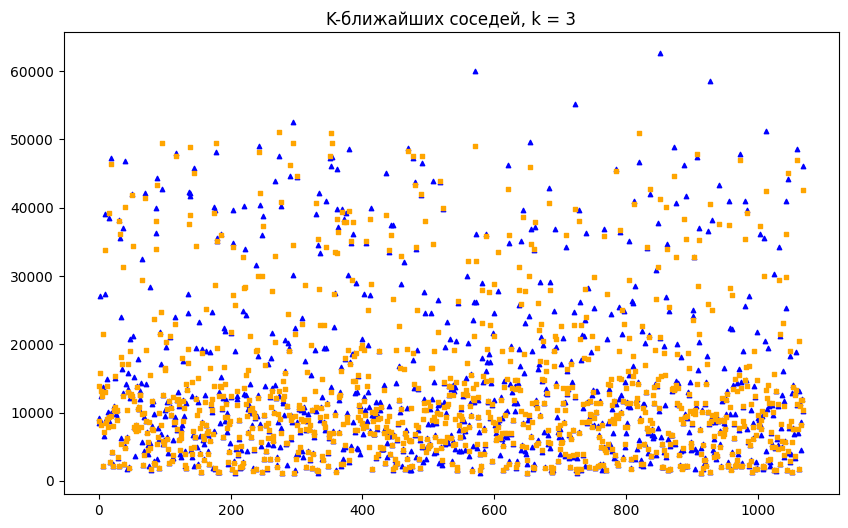

In [37]:
# К-ближайших соседей - KNeighborsRegressor(n_neighbors = 3)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train_minmax, y_train)
knn_pred = knn.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(knn_pred)), knn_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'K-ближайших соседей, k = 3')

Text(0.5, 1.0, 'K-ближайших соседей, k = 5')

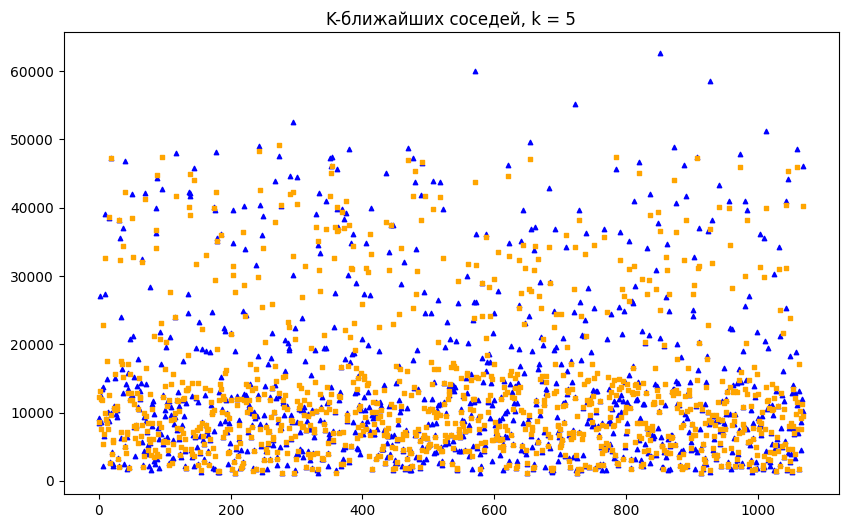

In [38]:
# К-ближайших соседей - KNeighborsRegressor(n_neighbors = 5)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train_minmax, y_train)
knn_pred = knn.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(knn_pred)), knn_pred, s = 10, marker ="s",color = 'orange')
plt.title(f'K-ближайших соседей, k = 5')

Text(0.5, 1.0, 'K-ближайших соседей, k = 9')

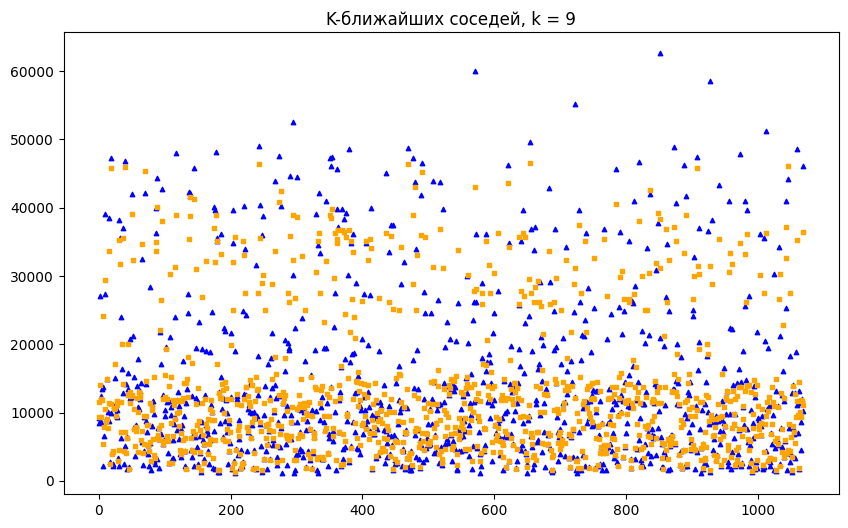

In [39]:
# К-ближайших соседей - KNeighborsRegressor(n_neighbors = 9)
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train_minmax, y_train)
knn_pred = knn.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(knn_pred)), knn_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'K-ближайших соседей, k = 9')

* D. Случайный лес (RandomForestClassifier, RandomForestRegressor)
_Используется RandomForestRegressor_

Text(0.5, 1.0, 'Случайный лес')

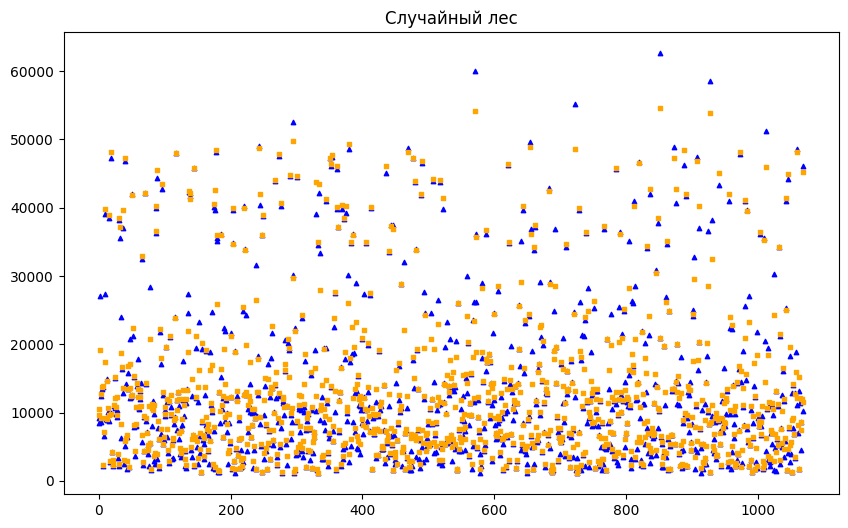

In [42]:
# Случайный лес - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_minmax, y_train)
forest_pred = forest.predict(X_train_minmax)

plt.figure(figsize = (10, 6))
# Истинное значение - "^", blue
plt.scatter(range(len(y_train)), y_train, s = 10, marker ="^", color = 'blue')
# Предсказанное значение - "s", orange
plt.scatter(range(len(forest_pred)), forest_pred, s = 10, marker ="s", color = 'orange')
plt.title(f'Случайный лес')

5. Метрики для train и test множеств: 
- Для задачи классификации -- Accuracy, ROC-AUC, PR, F1 
- Для задачи регрессии -- MAE, RMSE, MAPE  
_Вычисляются MAE, RMSE, MAPE, так как задача регерссии_

In [44]:
# Вычисление метрик для train и test данных
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Кодирование категориальных признаков
label_encoder = LabelEncoder()
X_train['sex'] = label_encoder.fit_transform(X_train['sex'])
X_train['smoker'] = label_encoder.fit_transform(X_train['smoker'])
X_train['region'] = label_encoder.fit_transform(X_train['region'])

models = [
    ('Линейная регрессия', LinearRegression()),
    ('Деревянная модель (depth = 3)', DecisionTreeRegressor()),
    ('Деревянная модель (depth = 9)', DecisionTreeRegressor(max_depth = 9, random_state=42)),
    ('Деревянная модель (depth = 12)', DecisionTreeRegressor(max_depth = 12, random_state=42)),
    ('К-ближайших соседей (k = 3)', KNeighborsRegressor(n_neighbors = 3)),
    ('К-ближайших соседей (k = 5)', KNeighborsRegressor(n_neighbors = 5)),
    ('К-ближайших соседей (k = 9)', KNeighborsRegressor(n_neighbors = 9)),
    ('Случайный лес', RandomForestRegressor(random_state = 42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)

for name, model in models:
    y_train_pred = model.predict(X_train_minmax)
    y_test_pred = model.predict(X_test_minmax)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    
    print(f"{name}:")
    print(f"Train MAE: {mae_train:.2f}")
    print(f"Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Train MAPE: {mape_train:.2f}")
    print(f"Test MAPE: {mape_test:.2f}")
    print()

    

Линейная регрессия:
Train MAE: 20503.96
Test MAE: 20240.25
Train RMSE: 21819.61
Test RMSE: 21464.88
Train MAPE: 2.84
Test MAPE: 3.03

Деревянная модель (depth = 3):
Train MAE: 9148.31
Test MAE: 8809.53
Train RMSE: 12657.76
Test RMSE: 12556.77
Train MAPE: 0.63
Test MAPE: 0.62

Деревянная модель (depth = 9):
Train MAE: 9132.80
Test MAE: 8788.59
Train RMSE: 12648.81
Test RMSE: 12548.02
Train MAPE: 0.63
Test MAPE: 0.61

Деревянная модель (depth = 12):
Train MAE: 9172.91
Test MAE: 8821.14
Train RMSE: 12671.39
Test RMSE: 12561.89
Train MAPE: 0.64
Test MAPE: 0.62

К-ближайших соседей (k = 3):
Train MAE: 9195.04
Test MAE: 9055.51
Train RMSE: 14394.39
Test RMSE: 14569.35
Train MAPE: 0.69
Test MAPE: 0.70

К-ближайших соседей (k = 5):
Train MAE: 9872.79
Test MAE: 9593.93
Train RMSE: 15151.87
Test RMSE: 15285.98
Train MAPE: 0.65
Test MAPE: 0.64

К-ближайших соседей (k = 9):
Train MAE: 10668.95
Test MAE: 10314.59
Train RMSE: 15906.92
Test RMSE: 16006.59
Train MAPE: 0.66
Test MAPE: 0.63

Случайный л

c:\Users\ABCYu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ABCYu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ABCYu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\ABCYu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

6. Сравнение метрик относительно train/test и относительно разных моделей.  
* A. Какая модель справилась лучше с поставленной задачей?  
Деревянная модель с max_depth = 9 справилась лучше с поставленной задачей.  
* B. Имеет ли место преобчение?  
Деревянная модель с max_depth = 12 является переобученной моделью, что можно заметить из графика.  
* C. Имеет ли место недообучение?  
Все модели могут аппроксимировать данные на достаточном уровне.  
* D. Как можно улучшить метрики моделей?  
Для улучшения метрик моделей можно использовать иную функцию нормализации данных: StandardScaler; изменить параметры для обучения модели в деревянной модели - глубину деревьев, в k-ближайших соседей - количество соседей; увеличить размер обучающей выборки.